In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

file = "Analysis Scripts/HexOutput_1.0.csv"

latticeSizes = [20, 40]
global_CSVData = pd.read_csv(file, sep=',', index_col=0)
global_CSVData.index = global_CSVData.index * (8.6173E-5 / (1.0E-3))

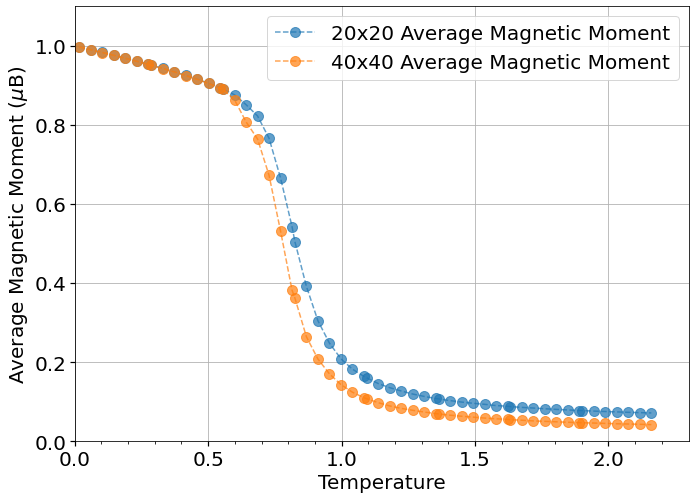

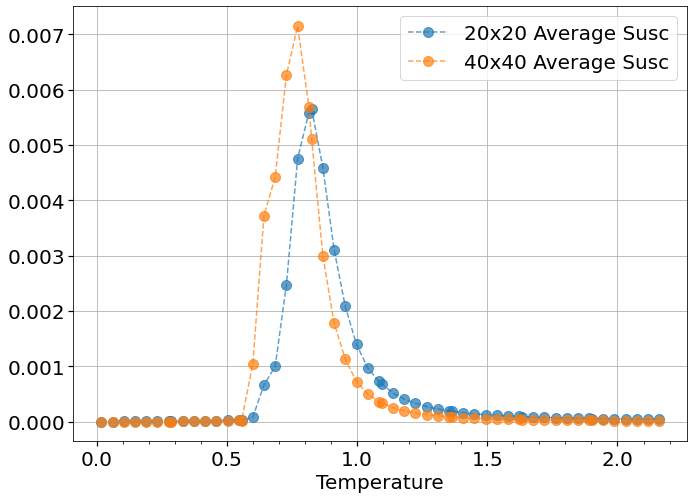

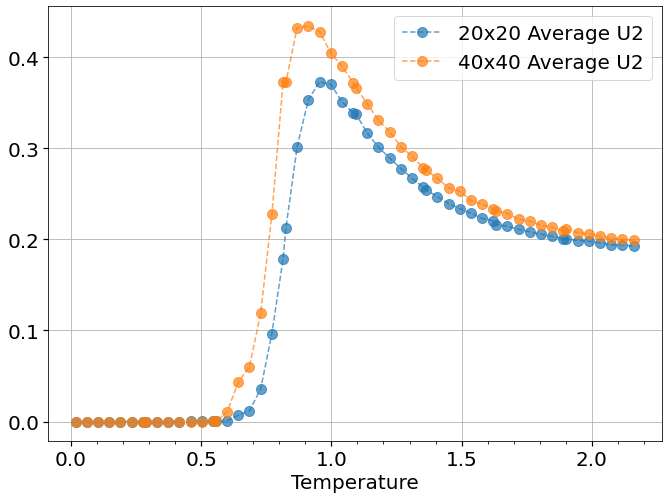

In [8]:
plt.rcParams.update({"font.size":20})

fig, ax = plt.subplots(figsize = (11,8))
fig2, ax2 = plt.subplots(figsize = (11,8))
fig3, ax3 = plt.subplots(figsize = (11,8))

ax.set_xlim(0, 2.3)
ax.set_ylim(0, 1.1)

#ax.set_title(r"Comparison of Models")
#ax2.set_title(r"Heisenberg Model: Axis Anisotropy = 4.5 meV/m$^2$")

ax.set_ylabel(r"Average Magnetic Moment ($\mu$B)")

for i in latticeSizes:
    global_CSVData.plot(y = "{}x{} Average Magnetic Moment".format(i,i), 
                        ax=ax, grid=True, alpha=0.7,
                        marker='o',
                        linestyle = 'dashed',
                        markersize=10
                        #yerr = "{}x{} Magnetic Moment std".format(i,i),
                        #capsize = 4, color = 'black'
                       )
    global_CSVData.plot(y = "{}x{} Average Susc".format(i,i), 
                        ax=ax2, grid=True, alpha=0.7,
                        marker='o',
                        markersize = 10,
                        linestyle = 'dashed'
                       )
    global_CSVData.plot(y = "{}x{} Average U2".format(i,i), 
                        ax=ax3, grid=True, alpha=0.7, 
                        marker='o',
                        markersize = 10,
                        linestyle = 'dashed'
                       )


ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='minor', length=3, color='black', width = 0.8)
ax.tick_params(which='major', length=5, color='black', width = 1.2)


ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which='minor', length=3, color='black', width = 0.8)
ax2.tick_params(which='major', length=5, color='black', width = 1.2)


ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.tick_params(which='minor', length=3, color='black', width = 0.8)
ax3.tick_params(which='major', length=5, color='black', width = 1.2)

    
#ax.legend(['Ising Model: {+3, -3}', r'$\gamma$ = 0.045meV'])#, r'$\gamma$ = 4.5meV'])
#ax2.legend(['Ising Model: {+3, -3}', r'Heisenberg Model: J$_{\mathrm{axis}}$ = 4.5meV'])